In [1]:
import numpy as np
import pandas as pd

import pytraj as pt
import mdtraj as md
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt

import pickle
import os
import sys

from glob import glob

import free_energy_clustering as FEC

## References and trajectories

In [2]:
rf0=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

rf1=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot1.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7')

rf2=pt.load('../1-Trajectories/0-Parm_rst//closed6_dry_rot2.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7')

rf3=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot3.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7')

rf4=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot4.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7')

rf5=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot5.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('../1-Trajectories/0-Parm_rst/open10_dry.rst7',
               '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

In [3]:
indir1 = '../1-Trajectories/2-NoEq_with_IPA'
indir2 = '../1-Trajectories/4-Adaptive_sampling_with_IPA'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'

traj_list1 = sorted(glob(indir1+'/*.nc'))
traj_list2 = sorted(glob(indir2+'/*.nc'))

traj_list=traj_list1+traj_list2
traj_list

['../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_01.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_02.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_03.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_04.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_05.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_06.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_07.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_08.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_09.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_10.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_01.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_02.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_03.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_04.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_05.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_06.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_07.nc',
 '../1-Traj

## GMM construction with limited dataset

First the GMM is built using uncorrelated data. We assume the data to be uncorrelated for a frame every 500 ps (dt=5)

The trajectory is therefore first loaded with a stride of 5

In [4]:
traj = pt.iterload(traj_list, topfile, stride=10)

The RMSD is then calculated. Because of the symmerty and chain IDs, 6 references are used for the closed form (simplky corresponding to a rotation of the chain IDs, and the minimum RMSD is retained

In [5]:
rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")

rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)

rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")

We construct a array Z with the RMSD to the closed form and to the open form for each frame of the reduced trajectory

In [6]:
Z=[]
for i in range(0,len(rmsd_open)):
    a=np.array([rmsd_closed[i],rmsd_open[i]])
    Z.append(a)
Z=np.array(Z)

### n_splits = 5, shuffle_data=True

We need to find the optimum number of components for constructing the GMM so we screen for a window of 2 to 20 components.

In [7]:
fec1 = FEC.FreeEnergyClustering(Z, min_n_components=5, max_n_components=20, temperature=293.15,
                               x_lims=[[0.0,4.5],[0.0,4.5]], 
                               n_iterations=5, n_grids=151, 
                               n_splits=5, shuffle_data=True,
                               stack_landscapes=False)

*----------------Gaussian mixture model free energy estimator----------------*
   n_splits = 5
   shuffle_data = True
   n_iterations = 5
   n_grids = 151
   covergence_tol = 0.0001
   stack_landscapes = False
   x_lims (axes limits) = [[0.0, 4.5], [0.0, 4.5]]
   temperature = 293.15
   min_n_components = 5
   max_n_components = 20
   n_components_step = 1
   Using weighted data: False
*----------------------------------------------------------------------------*


In [8]:
coords1, FE_landscape1, FE_points1 = fec1.landscape()

Estimating density with GMM.
# Components = 5
# Components = 6
# Components = 7
# Components = 8
# Components = 9
# Components = 10
# Components = 11
# Components = 12
# Components = 13
# Components = 14
# Components = 15
# Components = 16
# Components = 17
# Components = 18
# Components = 19
# Components = 20
Training final model with 20 components.
Evaluating density in landscape
Density grid shape: [151, 151]


We can then plot the FES

/home/el14718/Modelling/10-ALKEIG/12-Analysis_4/11-InfleCS_clustering_3/free_energy_clustering/GMM_free_energy.py:537: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("nipy_spectral"))
  my_cmap.set_over('white')


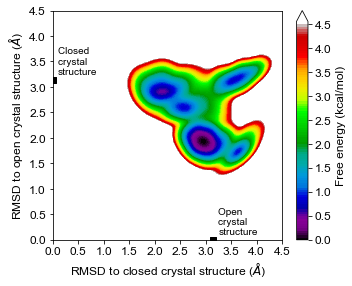

In [9]:
fec1.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap='nipy_spectral', lim=0.1, n_contour_levels=99, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10,rmsd_point_color='k', dx=1,
              filename='./plots/1-With_IPA/1-FES_with_IPA_dt5', ax=None)

In [10]:
labels1, cluster_centers1 = fec1.cluster(coords1, FE_points1,Z, assign_transition_points=False)
print("Cluster center indices: "+str(cluster_centers1))

Clustering free energy landscape...
Computing Hessians of density landscape.
Point: 22801/22801
Constructing connected components.
# Graph connections: 6990.0
Clustering data points.
Cluster labels: [0. 1. 2. 3. 4. 5.]
Done clustering.
Cluster center indices: [72694 49838 22946 19808 37336]


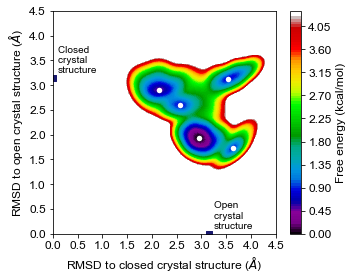

In [11]:
fec1.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='nipy_spectral', lim=0.1, n_contour_levels=100, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.0, core_point_edgecolor='k', 
              colormap2='jet',clust_point_edgecolor='k', clust_point_facecolor='w', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='neither', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=1,
              filename='./plots/1-With_IPA/3-FES_with_IPA_with_cluster_centres_dt5.png', ax=None)

### n_splits = 1, stacking_landscapes=True

In [12]:
fec2 = FEC.FreeEnergyClustering(Z, min_n_components=5, max_n_components=20, temperature=293.15,
                               x_lims=[[0.0,4.5],[0.0,4.5]], 
                               n_iterations=5, n_grids=151, 
                               n_splits=1, shuffle_data=False,
                               stack_landscapes=True)
coords2, FE_landscape2, FE_points2 = fec2.landscape()

*----------------Gaussian mixture model free energy estimator----------------*
   n_splits = 1
   shuffle_data = False
   n_iterations = 5
   n_grids = 151
   covergence_tol = 0.0001
   stack_landscapes = True
   x_lims (axes limits) = [[0.0, 4.5], [0.0, 4.5]]
   temperature = 293.15
   min_n_components = 5
   max_n_components = 20
   n_components_step = 1
   Using weighted data: False
*----------------------------------------------------------------------------*
Estimating density with stacked GMMs.
# Components = 5
# Components = 6
# Components = 7
# Components = 8
# Components = 9
# Components = 10
# Components = 11
# Components = 12
# Components = 13
# Components = 14
# Components = 15
# Components = 16
# Components = 17
# Components = 18
# Components = 19
# Components = 20
Removing zero-weighted models.
[<free_energy_clustering.GMM.GaussianMixture object at 0x7fc0b69037d0>, <free_energy_clustering.GMM.GaussianMixture object at 0x7fc0b69038d0>]
Model weights: [0.99066235 0.00933765

/home/el14718/Modelling/10-ALKEIG/12-Analysis_4/11-InfleCS_clustering_3/free_energy_clustering/GMM_free_energy.py:537: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("nipy_spectral"))
  my_cmap.set_over('white')


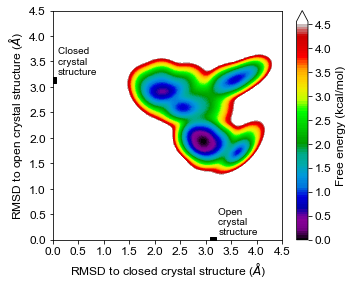

In [13]:
fec2.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap='nipy_spectral', lim=0.1, n_contour_levels=99, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10,rmsd_point_color='k', dx=1,
              filename='./plots/1-With_IPA/1-FES_with_IPA_dt5', ax=None)

In [14]:
labels2, cluster_centers2 = fec2.cluster(coords2, FE_points2,Z, assign_transition_points=False)
print("Cluster center indices: "+str(cluster_centers2))

Clustering free energy landscape...
Computing Hessians of density landscape.
Point: 22801/22801
Constructing connected components.
# Graph connections: 6138.0
Clustering data points.
Cluster labels: [0. 1. 2. 3. 4. 5.]
Done clustering.
Cluster center indices: [73904 58991 23005 14718 36606]


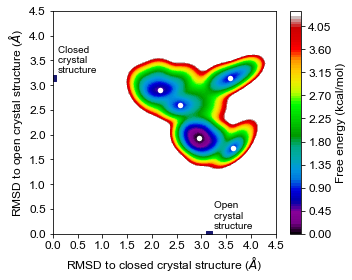

In [15]:
fec2.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='nipy_spectral', lim=0.1, n_contour_levels=100, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.0, core_point_edgecolor='k', 
              colormap2='jet',clust_point_edgecolor='k', clust_point_facecolor='w', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='neither', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=1,
              filename='./plots/1-With_IPA/3-FES_with_IPA_with_cluster_centres_dt5.png', ax=None)

### n_splits = 10, stacking_landscapes=False, shuffle_data=True

In [16]:
fec3 = FEC.FreeEnergyClustering(Z, min_n_components=5, max_n_components=20, temperature=293.15,
                               x_lims=[[0.0,4.5],[0.0,4.5]], 
                               n_iterations=5, n_grids=151, 
                               n_splits=10, shuffle_data=True,
                               stack_landscapes=False)
coords3, FE_landscape3, FE_points3 = fec3.landscape()

*----------------Gaussian mixture model free energy estimator----------------*
   n_splits = 10
   shuffle_data = True
   n_iterations = 5
   n_grids = 151
   covergence_tol = 0.0001
   stack_landscapes = False
   x_lims (axes limits) = [[0.0, 4.5], [0.0, 4.5]]
   temperature = 293.15
   min_n_components = 5
   max_n_components = 20
   n_components_step = 1
   Using weighted data: False
*----------------------------------------------------------------------------*
Estimating density with GMM.
# Components = 5
# Components = 6
# Components = 7
# Components = 8
# Components = 9
# Components = 10
# Components = 11
# Components = 12
# Components = 13
# Components = 14
# Components = 15
# Components = 16
# Components = 17
# Components = 18
# Components = 19
# Components = 20
Training final model with 20 components.
Evaluating density in landscape
Density grid shape: [151, 151]


/home/el14718/Modelling/10-ALKEIG/12-Analysis_4/11-InfleCS_clustering_3/free_energy_clustering/GMM_free_energy.py:537: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("nipy_spectral"))
  my_cmap.set_over('white')


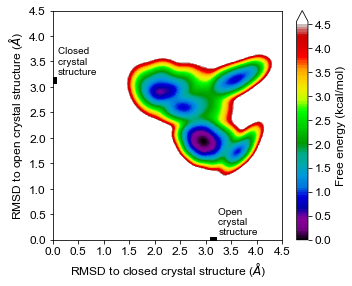

In [17]:
fec3.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap='nipy_spectral', lim=0.1, n_contour_levels=99, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10,rmsd_point_color='k', dx=1,
              filename='./plots/1-With_IPA/1-FES_with_IPA_dt5', ax=None)

In [18]:
labels3, cluster_centers3 = fec3.cluster(coords3, FE_points3,Z, assign_transition_points=False)
print("Cluster center indices: "+str(cluster_centers3))

Clustering free energy landscape...
Computing Hessians of density landscape.
Point: 22801/22801
Constructing connected components.
# Graph connections: 7714.0
Clustering data points.
Cluster labels: [0. 1. 2. 3. 4. 5.]
Done clustering.
Cluster center indices: [61155 33415 24167  5850 38429]


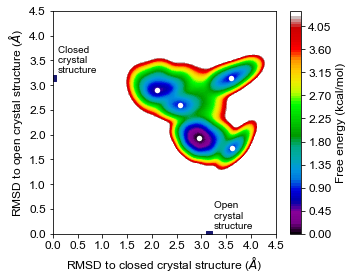

In [19]:
fec3.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='nipy_spectral', lim=0.1, n_contour_levels=100, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.0, core_point_edgecolor='k', 
              colormap2='jet',clust_point_edgecolor='k', clust_point_facecolor='w', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='neither', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=1,
              filename='./plots/1-With_IPA/3-FES_with_IPA_with_cluster_centres_dt5.png', ax=None)

### n_splits = 10, stacking_landscapes=True, shuffle_data=True

In [20]:
fec4 = FEC.FreeEnergyClustering(Z, min_n_components=5, max_n_components=20, temperature=293.15,
                               x_lims=[[0.0,4.5],[0.0,4.5]], 
                               n_iterations=5, n_grids=151, 
                               n_splits=10, shuffle_data=True,
                               stack_landscapes=True)
coords4, FE_landscape4, FE_points4 = fec4.landscape()

*----------------Gaussian mixture model free energy estimator----------------*
   n_splits = 10
   shuffle_data = True
   n_iterations = 5
   n_grids = 151
   covergence_tol = 0.0001
   stack_landscapes = True
   x_lims (axes limits) = [[0.0, 4.5], [0.0, 4.5]]
   temperature = 293.15
   min_n_components = 5
   max_n_components = 20
   n_components_step = 1
   Using weighted data: False
*----------------------------------------------------------------------------*
Estimating density with stacked GMMs.
# Components = 5
# Components = 6
# Components = 7
# Components = 8
# Components = 9
# Components = 10
# Components = 11
# Components = 12
# Components = 13
# Components = 14
# Components = 15
# Components = 16
# Components = 17
# Components = 18
# Components = 19
# Components = 20
Removing zero-weighted models.
Model weights: [1.]
GMM list: [<free_energy_clustering.GMM.GaussianMixture object at 0x7fc0a9438050>]
# Components in models: [17]
Evaluating density in landscape
Density grid shap

/home/el14718/Modelling/10-ALKEIG/12-Analysis_4/11-InfleCS_clustering_3/free_energy_clustering/GMM_free_energy.py:537: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("nipy_spectral"))
  my_cmap.set_over('white')


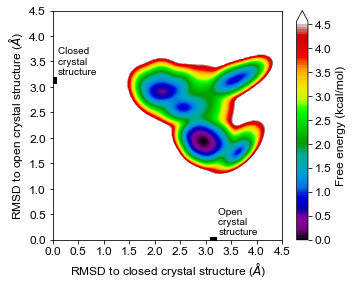

In [21]:
fec4.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap='nipy_spectral', lim=0.1, n_contour_levels=99, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10,rmsd_point_color='k', dx=1,
              filename='./plots/1-With_IPA/1-FES_with_IPA_dt5', ax=None)

In [22]:
labels4, cluster_centers4 = fec4.cluster(coords4, FE_points4,Z, assign_transition_points=False)
print("Cluster center indices: "+str(cluster_centers4))

Clustering free energy landscape...
Computing Hessians of density landscape.
Point: 22801/22801
Constructing connected components.
# Graph connections: 6896.0
Clustering data points.
Cluster labels: [0. 1. 2. 3. 4. 5.]
Done clustering.
Cluster center indices: [60039 33415  7764 19808 38365]


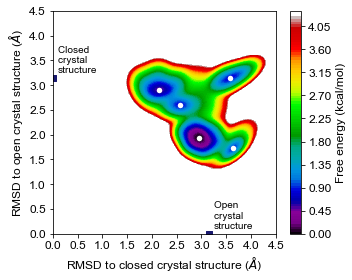

In [23]:
fec4.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='nipy_spectral', lim=0.1, n_contour_levels=100, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.0, core_point_edgecolor='k', 
              colormap2='jet',clust_point_edgecolor='k', clust_point_facecolor='w', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='neither', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=1,
              filename='./plots/1-With_IPA/3-FES_with_IPA_with_cluster_centres_dt5.png', ax=None)

### n_splits = 1, stacking_landscapes=False, shuffle_data=False

In [24]:
fec5 = FEC.FreeEnergyClustering(Z, min_n_components=5, max_n_components=20, temperature=293.15,
                               x_lims=[[0.0,4.5],[0.0,4.5]], 
                               n_iterations=5, n_grids=151, 
                               n_splits=1, shuffle_data=False,
                               stack_landscapes=False)
coords5, FE_landscape5, FE_points5 = fec5.landscape()

*----------------Gaussian mixture model free energy estimator----------------*
   n_splits = 1
   shuffle_data = False
   n_iterations = 5
   n_grids = 151
   covergence_tol = 0.0001
   stack_landscapes = False
   x_lims (axes limits) = [[0.0, 4.5], [0.0, 4.5]]
   temperature = 293.15
   min_n_components = 5
   max_n_components = 20
   n_components_step = 1
   Using weighted data: False
*----------------------------------------------------------------------------*
Estimating density with GMM.
# Components = 5
# Components = 6
# Components = 7
# Components = 8
# Components = 9
# Components = 10
# Components = 11
# Components = 12
# Components = 13
# Components = 14
# Components = 15
# Components = 16
# Components = 17
# Components = 18
# Components = 19
# Components = 20
Identifying final model with 11 components.
Evaluating density in landscape
Density grid shape: [151, 151]


/home/el14718/Modelling/10-ALKEIG/12-Analysis_4/11-InfleCS_clustering_3/free_energy_clustering/GMM_free_energy.py:537: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("nipy_spectral"))
  my_cmap.set_over('white')


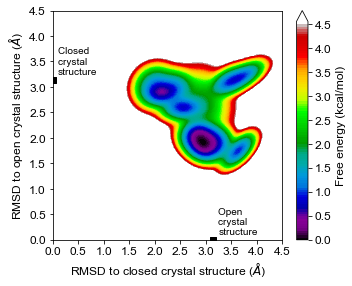

In [25]:
fec5.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap='nipy_spectral', lim=0.1, n_contour_levels=99, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10,rmsd_point_color='k', dx=1,
              filename='./plots/1-With_IPA/1-FES_with_IPA_dt5', ax=None)

In [26]:
labels5, cluster_centers5 = fec5.cluster(coords5, FE_points5,Z, assign_transition_points=False)
print("Cluster center indices: "+str(cluster_centers5))

Clustering free energy landscape...
Computing Hessians of density landscape.
Point: 22801/22801
Constructing connected components.
# Graph connections: 8918.0
Clustering data points.
Cluster labels: [0. 1. 2. 3. 4. 5.]
Done clustering.
Cluster center indices: [60720 75058 24167 19900 36606]


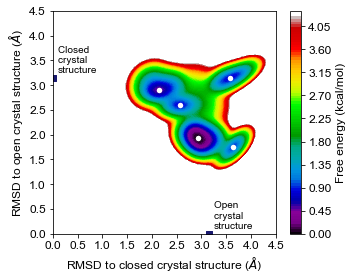

In [27]:
fec5.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='nipy_spectral', lim=0.1, n_contour_levels=100, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.0, core_point_edgecolor='k', 
              colormap2='jet',clust_point_edgecolor='k', clust_point_facecolor='w', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='neither', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=1,
              filename='./plots/1-With_IPA/3-FES_with_IPA_with_cluster_centres_dt5.png', ax=None)

### n_splits = 1, stacking_landscapes=False, shuffle_data=False, n_iterations=10 

In [28]:
fec6 = FEC.FreeEnergyClustering(Z, min_n_components=5, max_n_components=20, temperature=293.15,
                               x_lims=[[0.0,4.5],[0.0,4.5]], 
                               n_iterations=10, n_grids=151, 
                               n_splits=1, shuffle_data=False,
                               stack_landscapes=False)
coords6, FE_landscape6, FE_points6 = fec6.landscape()

*----------------Gaussian mixture model free energy estimator----------------*
   n_splits = 1
   shuffle_data = False
   n_iterations = 10
   n_grids = 151
   covergence_tol = 0.0001
   stack_landscapes = False
   x_lims (axes limits) = [[0.0, 4.5], [0.0, 4.5]]
   temperature = 293.15
   min_n_components = 5
   max_n_components = 20
   n_components_step = 1
   Using weighted data: False
*----------------------------------------------------------------------------*
Estimating density with GMM.
# Components = 5
# Components = 6
# Components = 7
# Components = 8
# Components = 9
# Components = 10
# Components = 11
# Components = 12
# Components = 13
# Components = 14
# Components = 15
# Components = 16
# Components = 17
# Components = 18
# Components = 19
# Components = 20
Identifying final model with 11 components.
Evaluating density in landscape
Density grid shape: [151, 151]


/home/el14718/Modelling/10-ALKEIG/12-Analysis_4/11-InfleCS_clustering_3/free_energy_clustering/GMM_free_energy.py:537: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("nipy_spectral"))
  my_cmap.set_over('white')


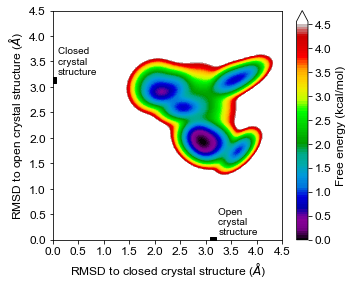

In [29]:
fec6.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap='nipy_spectral', lim=0.1, n_contour_levels=99, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10,rmsd_point_color='k', dx=1,
              filename='./plots/1-With_IPA/1-FES_with_IPA_dt5', ax=None)

In [30]:
labels6, cluster_centers6 = fec6.cluster(coords6, FE_points6,Z, assign_transition_points=False)
print("Cluster center indices: "+str(cluster_centers6))

Clustering free energy landscape...
Computing Hessians of density landscape.
Point: 22801/22801
Constructing connected components.
# Graph connections: 9110.0
Clustering data points.
Cluster labels: [0. 1. 2. 3. 4. 5.]
Done clustering.
Cluster center indices: [60720 75058 24167 19900 36606]


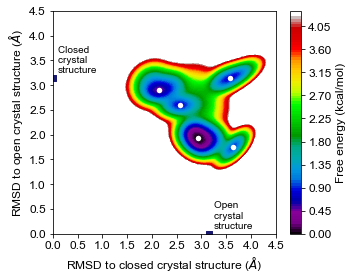

In [31]:
fec6.visualize(fontsize=12, savefig=False, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='nipy_spectral', lim=0.1, n_contour_levels=100, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.0, core_point_edgecolor='k', 
              colormap2='jet',clust_point_edgecolor='k', clust_point_facecolor='w', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='neither', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=1,
              filename='./plots/1-With_IPA/3-FES_with_IPA_with_cluster_centres_dt5.png', ax=None)